In [1]:
from node import Server, Client
from model import LogisticRegressionModel, CNN
from utils import download_and_divide_data
from matplotlib import pyplot as plt

# FL init

In [2]:
client_num=2 # number of clients
rounds=5 # communication rounds
epochs=2 # local epochs
clients=[]
for i in range(client_num):
    clients.append(Client(id=i))
server=Server(clients=clients, rounds=rounds, epochs=epochs)

# Logistic Regression on MNIST dataset

Client 1: 100%|██████████| 2/2 [00:05<00:00,  2.85s/it, loss=0.291]


Round: 0.  Accuracy: 91.24


Client 1: 100%|██████████| 2/2 [00:05<00:00,  2.80s/it, loss=0.294]


Round: 1.  Accuracy: 91.91


Client 1: 100%|██████████| 2/2 [00:05<00:00,  2.81s/it, loss=0.153]


Round: 2.  Accuracy: 92.19


Client 1: 100%|██████████| 2/2 [00:05<00:00,  2.81s/it, loss=0.111]


Round: 3.  Accuracy: 92.43


Client 1: 100%|██████████| 2/2 [00:05<00:00,  2.82s/it, loss=0.35] 


Round: 4.  Accuracy: 92.48


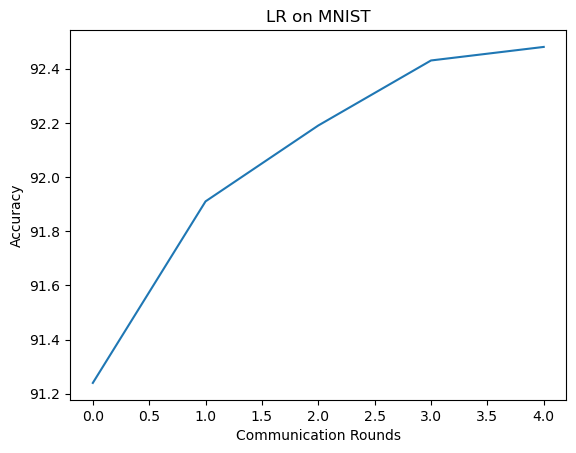

In [3]:
train_datasets, test_dataset=download_and_divide_data("mnist", client_num)
for i in range(client_num):
    clients[i].load_dataset(train_datasets[i])
server.load_dataset(test_dataset)

server.load_model(LogisticRegressionModel())
accs=server.train()
plt.plot(accs)
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy")
plt.title("LR on MNIST")
plt.show()

# CNN on cifar10 dataset

Files already downloaded and verified
Files already downloaded and verified


Client 1: 100%|██████████| 2/2 [00:15<00:00,  7.92s/it, loss=1.41]


Round: 0.  Accuracy: 19.99


Client 1: 100%|██████████| 2/2 [00:15<00:00,  7.97s/it, loss=0.71] 


Round: 1.  Accuracy: 67.24


Client 1: 100%|██████████| 2/2 [00:15<00:00,  7.98s/it, loss=0.852]


Round: 2.  Accuracy: 72.72


Client 1: 100%|██████████| 2/2 [00:16<00:00,  8.02s/it, loss=0.508]


Round: 3.  Accuracy: 75.34


Client 1: 100%|██████████| 2/2 [00:16<00:00,  8.02s/it, loss=0.429]


Round: 4.  Accuracy: 76.31


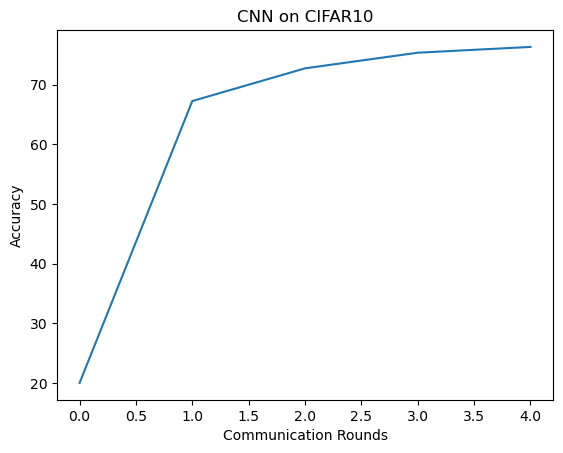

In [4]:
train_datasets, test_dataset = download_and_divide_data("cifar10", client_num)
for i in range(client_num):
    clients[i].load_dataset(train_datasets[i])
server.load_dataset(test_dataset)

server.load_model(CNN())
accs = server.train()
plt.plot(accs)
plt.xlabel("Communication Rounds")
plt.ylabel("Accuracy")
plt.title("CNN on CIFAR10")
plt.show()